# Polinomial Linear Regression - Ejemplo - Precio de Celulares

**Contexto**  
Este conjunto de datos contiene el precio de celulares, de acuerdo diversos factores.

**Contenido**  
El conjunto de datos proviene de kaggle: [Mobile Price Prediction](https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction).  
Contiene 161 renglones, con las siguientes columnas:
* Product_id: identificador del celular
* **Price**: precio en USD **-> variable objetivo**
* Sale: número de ticket
* weight: peso
* resolution: resolución
* ppi: densidad en pixeles
* cpu core: número de núcleos de cpu
* cpu freq: frecuencia del cpu
* internal mem: memoria interna en GB
* ram: memoria RAM en GB
* RearCam: número de cámaras traseras
* Front_Cam: número de cámaras delanteras
* battery: batería
* thickness: ancho

**Planteamiento del problema**  
Se busca encontrar que factores tienen mayor influencia en el precio de los celulares.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
# Renombrar columnas
df.columns = ['id_producto', 'precio', 'ticket', 'peso', 'resolución', 'densidad_pixel', 'nucleos_cpu',
              'frec_cpu', 'mem_interna', 'ram', 'camara_tras', 'camara_frontal', 'bateria', 'ancho']

In [6]:
# Revisar los datos
df.describe()

,id_producto,precio,ticket,peso,resolución,densidad_pixel,nucleos_cpu,frec_cpu,mem_interna,ram,camara_tras,camara_frontal,bateria,ancho
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


**Nota:** tomar nota de los valores máximos de la variable independiente y la variable dependiente, para utilizarlos en la última gráfica

## Modelado

In [7]:
# Variable independiente
X = df[['ancho']]
X.head()

,ancho
0,7.4
1,9.9
2,7.6
3,11.0
4,9.9


In [8]:
# Variable dependiente
y = df['precio']
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: precio, dtype: int64

In [9]:
print('X:', len(X), 'y:', len(y))

X: 161 y: 161


In [10]:
# Conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 112 y_train: 112
X_test: 49 y_test: 49


In [12]:
# Creación de modelos
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

### Modelo lineal

In [13]:
# Entrenamiento
lr1 = model1.fit(X_train,y_train)

In [14]:
# Predicciones
pred1 = lr1.predict(X_test)
pred1

array([2684.93860685, 1344.08736718, 2436.63282172, 2064.17414404,
       2461.46340024, 2436.63282172, 1890.36009445, 2312.47992916,
       2188.3270366 , 1145.44273908, 2858.75265643, 2337.31050767,
       2213.15761511, 2486.29397875, 2461.46340024, 2163.49645809,
       2163.49645809, 2386.9716647 , 2163.49645809, 2188.3270366 ,
       2262.81877214, 2560.78571429, 1368.91794569, 1691.71546635,
       2486.29397875, 2958.07497048, 2585.6162928 , 2312.47992916,
       1741.37662338, 1890.36009445, 2312.47992916, 1865.52951594,
       2411.80224321, 3156.71959858, 1517.90141677, 3156.71959858,
       2163.49645809, 1940.02125148, 2113.83530106, 1716.54604486,
       2486.29397875, 2461.46340024, 3156.71959858, 2585.6162928 ,
       2684.93860685, 2486.29397875, 2213.15761511, 2312.47992916,
       1716.54604486])

### Modelo Cuadrático

In [15]:
# Transformar variables independientes
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)

In [16]:
# Entrenamiento
lr2 = model2.fit(X_quad,y_train)

In [17]:
# Predicciones
pred2 = lr2.predict(quadratic.fit_transform(X_test))
pred2

array([2750.38328016, 1268.92560362, 2434.1392597 , 1995.48346164,
       2464.90661616, 2434.1392597 , 1805.44242474, 2283.15929599,
       2136.94069664, 1096.68312664, 2983.08614163, 2312.97437958,
       2165.80350736, 2495.8644272 , 2464.90661616, 2108.26834049,
       2108.26834049, 2373.17591049, 2108.26834049, 2136.94069664,
       2224.10049253, 2589.88058775, 1291.31295883, 1599.67994273,
       2495.8644272 , 3120.24920596, 2621.60021708, 2283.15929599,
       1649.97783579, 1805.44242474, 2283.15929599, 1779.05552348,
       2403.56235781, 3403.71715418, 1429.63663611, 3403.71715418,
       2108.26834049, 1858.78759098, 2051.49499192, 1624.73366198,
       2495.8644272 , 2464.90661616, 3403.71715418, 2621.60021708,
       2750.38328016, 2495.8644272 , 2165.80350736, 2283.15929599,
       1624.73366198])

### Modelo Cúbico

In [18]:
# Transformar variables independientes
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X_train)

In [19]:
# Entrenamiento
lr3 = model3.fit(X_cubic,y_train)

In [20]:
# Predicciones
pred3 = lr3.predict(cubic.fit_transform(X_test))
pred3

array([2734.38465175, 1021.35148351, 2512.72549291, 2050.87780661,
       2538.6303905 , 2512.72549291, 1803.93492498, 2372.72012937,
       2217.66956909,  773.45840161, 2831.72067525, 2402.03054564,
       2249.72470515, 2563.77488847, 2538.6303905 , 2185.14478495,
       2185.14478495, 2458.74022675, 2185.14478495, 2217.66956909,
       2312.32030517, 2634.38166521, 1054.54632718, 1513.09525107,
       2563.77488847, 2861.88992325, 2656.2202452 , 2372.72012937,
       1585.97986246, 1803.93492498, 2372.72012937, 1767.83605635,
       2486.08662768, 2858.66291509, 1261.24500647, 2858.66291509,
       2185.14478495, 1875.64883643, 2118.79200022, 1549.52127723,
       2563.77488847, 2538.6303905 , 2858.66291509, 2656.2202452 ,
       2734.38465175, 2563.77488847, 2249.72470515, 2372.72012937,
       1549.52127723])

## Evaluación

In [21]:
# Modelo lineal
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 442.17608365660317
MSE: 288554.527245566
RMSE: 537.1727164009412


In [22]:
# Modelo cuadrático
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 464.1437010770504
MSE: 308395.9640121729
RMSE: 555.3341012509252


In [23]:
# Modelo cúbico
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

MAE: 403.670864414623
MSE: 253936.8673393875
RMSE: 503.92148926136053


<Axes: xlabel='precio', ylabel='Density'>

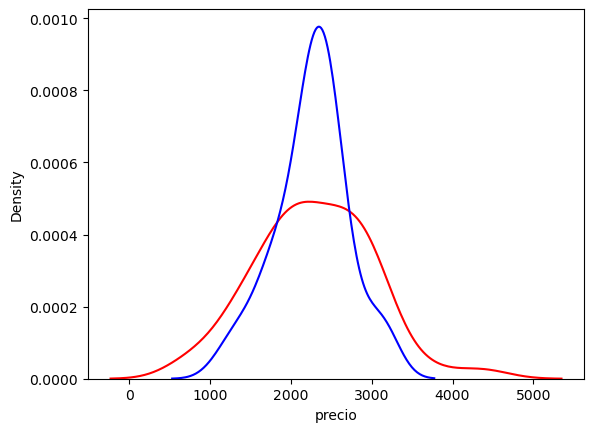

In [24]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(pred1, color="b", ax=ax1)

<Axes: xlabel='precio', ylabel='Density'>

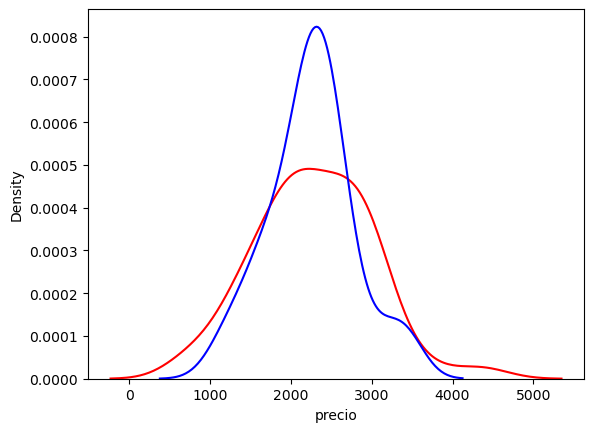

In [25]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(pred2, color="b", ax=ax1)

<Axes: xlabel='precio', ylabel='Density'>

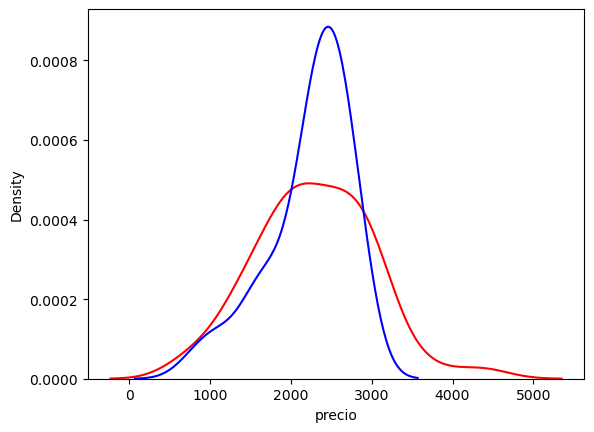

In [26]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(pred3, color="b", ax=ax1)

In [27]:
# Visualización de la predicción
# Dentro de X_plot, pone como segundo valor el máximo de la variable independiente
# y como tercer valor el máximo de la variable independiente
X_plot = np.linspace(2, 20, 5000).reshape(-1, 1)
lpred1 = lr1.predict(X_plot)
lpred2 = lr2.predict(quadratic.fit_transform(X_plot))
lpred3 = lr3.predict(cubic.fit_transform(X_plot))

C:\Users\csameshima\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


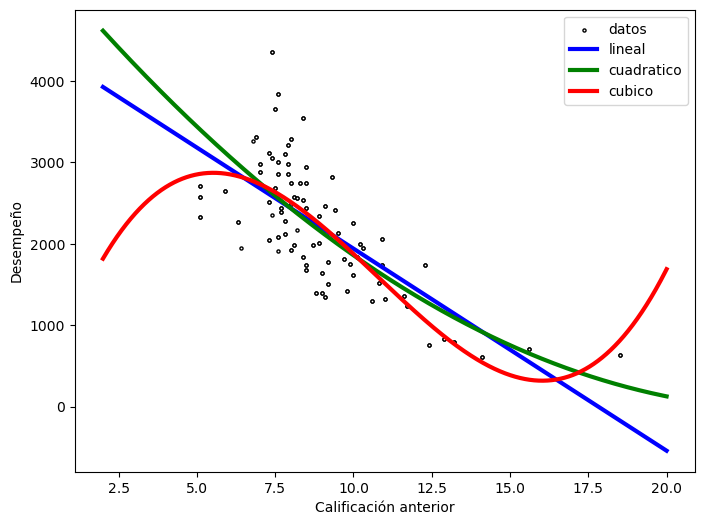

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='datos', color='white', edgecolor='black', s=5)
plt.plot(X_plot, lpred1, label='lineal', color='blue', lw=3, linestyle='-')
plt.plot(X_plot, lpred2, label='cuadratico', color='green', lw=3, linestyle='-')
plt.plot(X_plot, lpred3, label='cubico', color='red', lw=3, linestyle='-')

plt.xlabel('Calificación anterior')
plt.ylabel('Desempeño')
plt.legend(loc='best',fancybox=True)